## HST Prelim data: Periodograms to explore Luhman 16 A rotational period

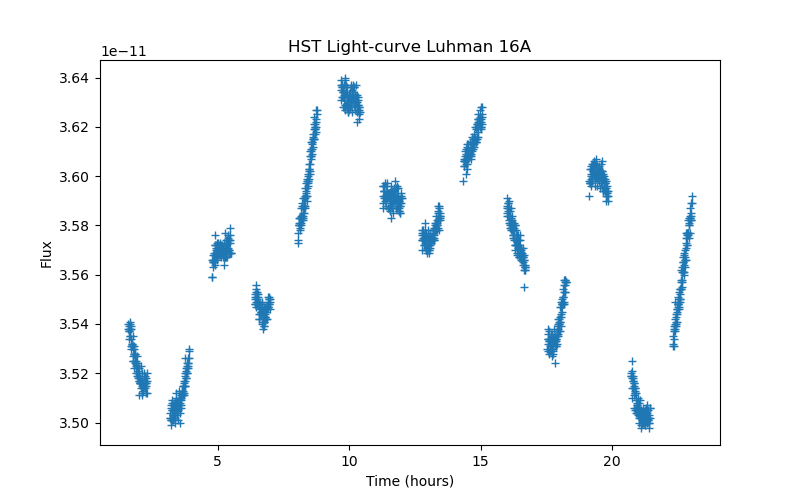

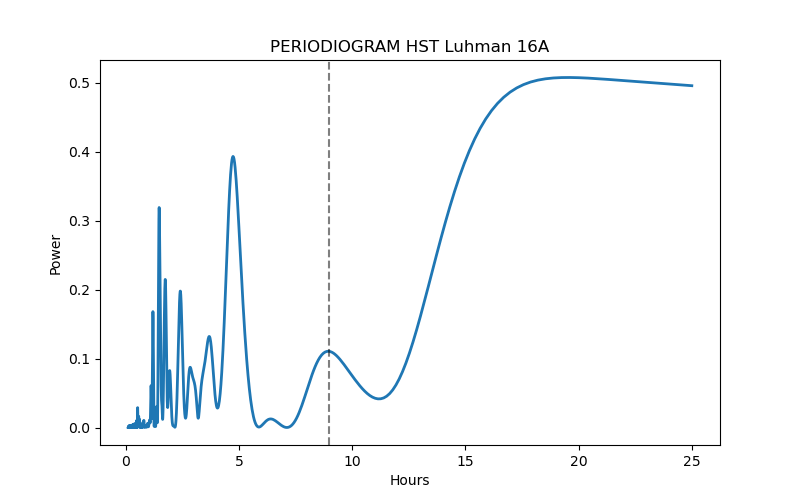

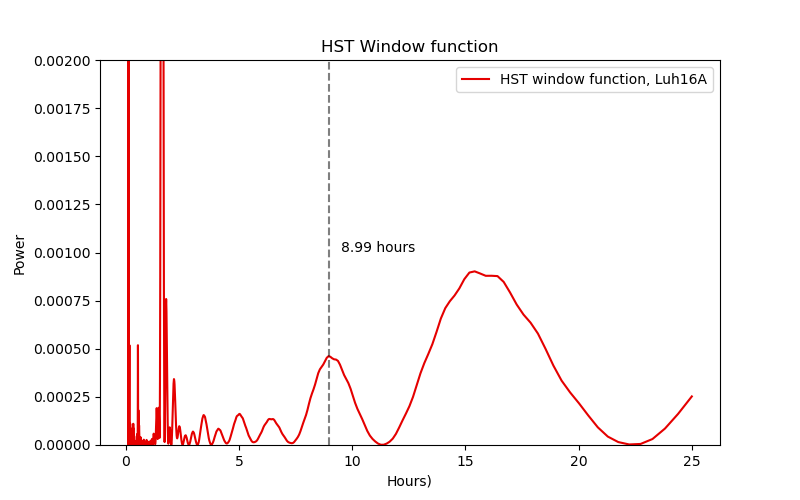

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget
from PyAstronomy.pyTiming import pyPeriod

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

### HST lightcurve
hst_pathA = "/Users/nguyendat/Documents/GitHub/aroma/AROMA_An_Exo_Rot_Mapping/data/HST_luh16AB_lc.txt"
headerstring = "Time Luh16A_flux Luh16B_flux Luh16A_flux_err Luh16B_flux_err"
headers = headerstring.split()

hstdata_raw = pd.read_csv(hst_path, names=headers, skiprows=2, sep=',')
hstdata_raw.head(20)

hstdata = hstdata_raw.iloc[np.where(hstdata_raw.Time > (hstdata_raw.Time[0]+0.066))]

time = (hstdata.Time-hstdata_raw.Time[0])*24 # day to hours
lcA   = hstdata.Luh16A_flux
elcA  = hstdata.Luh16A_flux_err
lcB   = hstdata.Luh16B_flux
elcB  = hstdata.Luh16B_flux_err

############ Plot lightcurve A ############
plt.close(), plt.figure(figsize=(8,5))
plt.plot(time, lcA, ls='', marker='+')
plt.xlabel('Time (hours)'), plt.ylabel('Flux'), plt.title('HST Light-curve Luhman 16A')

# fit_dir = join(homedir,'notebooks', 'periodSineFit_metadata')

############ Plot lightcurve A periodogram ############
periodmax=0.1
periodmin=25.0
frequen = np.linspace(1/periodmax,1/periodmin,10000)
# Compute the GLS periodogram with default options.
# Choose Zechmeister-Kuerster normalization explicitly
clp = pyPeriod.Gls((time,lcA,elcA), norm="ZK", freq=frequen,ofac=10)

fr = clp.freq
pw = clp.power
hpp = 1./fr

plt.figure(figsize=(8,5))
plt.plot(hpp, pw, '-', linewidth=2)
plt.ylabel('Power'), plt.xlabel('Hours')
plt.axvline(x=8.99, ymin=0, ymax=1, ls='--', alpha=0.5, c='k')
plt.title('PERIODIOGRAM HST Luhman 16A')
# plt.xlim(0,140)

############ Plot window function A periodogram ############

wtime = np.linspace(0.,1200,10000)
window = np.zeros(10000)
for ii in time:
   #print('Time value:',ii)
   ndx = find_nearest(wtime,ii)
   #print(ndx)
   window[ndx]=1.0
    # Calculate the Periodogram for the Window Function
    
wlp = pyPeriod.Gls((wtime,window), norm="ZK", freq=frequen,ofac=10)
wfr = wlp.freq
wpw = wlp.power
whpp = 1./wfr

# Add test sine wave
mu, sigma = 1.0, 0.013 # mean and standard deviation
period1 = 3 # hours
sinelc = 0.05*np.sin(2*np.pi*(time/period1))

sinelp=pyPeriod.Gls((time,sinelc), norm="ZK", freq=frequen,ofac=10)

sinefr = sinelp.freq
sinepw = sinelp.power
sinehpp=1./sinefr

plt.figure(figsize=(8,5))
plt.plot(whpp, wpw, c='xkcd:red', label='HST window function, Luh16A')
# plt.plot(sinehpp, 0.004*sinepw, c='xkcd:blue', label='1.58 hour sine wave')
plt.xlabel('Hours)'), plt.ylabel('Power'), plt.title('HST Window function')
plt.ylim((0,0.002))
plt.axvline(x=8.99, ymin=0, ymax=1, ls='--', alpha=0.5, c='k'),
plt.text(x=9.5, y=0.001, s='8.99 hours')
plt.legend()

# ############ Plot lightcurve B ############
# plt.figure(figsize=(8,5))
# plt.plot(time, lcB, ls='', marker='+', c='xkcd:orange')
# plt.xlabel('Time (hours)'), plt.ylabel('Flux'), plt.title('HST Light-curve Luhman 16B')

# ############ Plot lightcurve B periodogram ############
# periodmax=0.1
# periodmin=25.0
# frequen = np.linspace(1/periodmax,1/periodmin,10000)
# # Compute the GLS periodogram with default options.
# # Choose Zechmeister-Kuerster normalization explicitly
# clp = pyPeriod.Gls((time,lcB,elcB), norm="ZK", freq=frequen,ofac=10)

# fr = clp.freq
# pw = clp.power
# hpp = 1./fr

# plt.figure(figsize=(8,5))
# plt.plot(hpp, pw, '-', linewidth=2, c='xkcd:orange')
# plt.ylabel('Power'), plt.xlabel('Hours'), plt.axvline(x=8.26, ymin=0, ymax=1, ls='--', alpha=0.5, c='k')
# plt.title('PERIODIOGRAM HST Luhman 16B')

0.0041630674952610365


(Text(0.5, 0, 'Hours)'),
 Text(0, 0.5, 'Power'),
 Text(0.5, 1.0, 'HST Window function'))

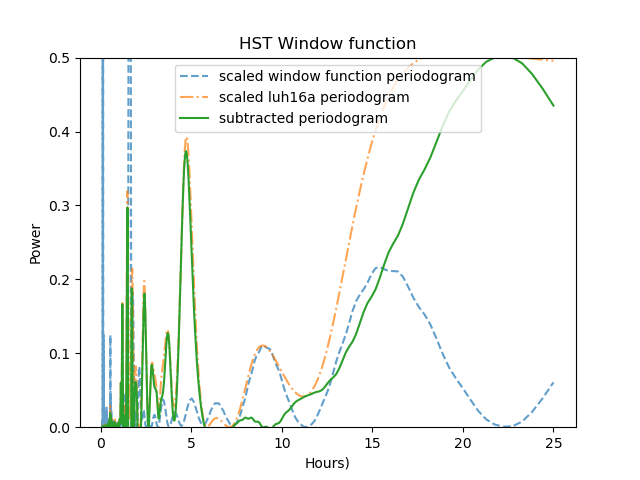

In [122]:
id = np.where(np.logical_and(whpp>8.98, whpp<9.04))[0][0]
scale_factor = wpw[id]/pw[id]
print(scale_factor)
wpw_norm = wpw /scale_factor
pw_norm = pw

plt.close('all'), plt.figure(),
plt.plot(whpp, wpw_norm, label='scaled window function periodogram', ls='--', alpha=0.7),
plt.plot(hpp, pw_norm, label='scaled luh16a periodogram', ls='-.', alpha=0.7),
plt.plot(whpp, pw_norm - wpw_norm, label='subtracted periodogram')
plt.legend(), plt.ylim((0,0.5))
plt.xlabel('Hours)'), plt.ylabel('Power'), plt.title('HST Window function')
